In [1]:
# importing required libraries 
from matplotlib import pyplot as plt 
import numpy as np 
import matplotlib.animation as animation 
from IPython import display 
import h5py
from scipy.spatial import Voronoi

# import the data
with h5py.File('runs/allweak_preferentialer.hdf5', 'r') as f:
    dat = f['cells'][:]
    properties = f['properties'][:]
    # energies = f['energies'][:]

    attributes = dict(f.attrs)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'runs/allweak_preferentialer.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [72]:
from utils import voronoi_plot_2d


(2514, 2)


(-65.0, 65.0, -65.0, 65.0)

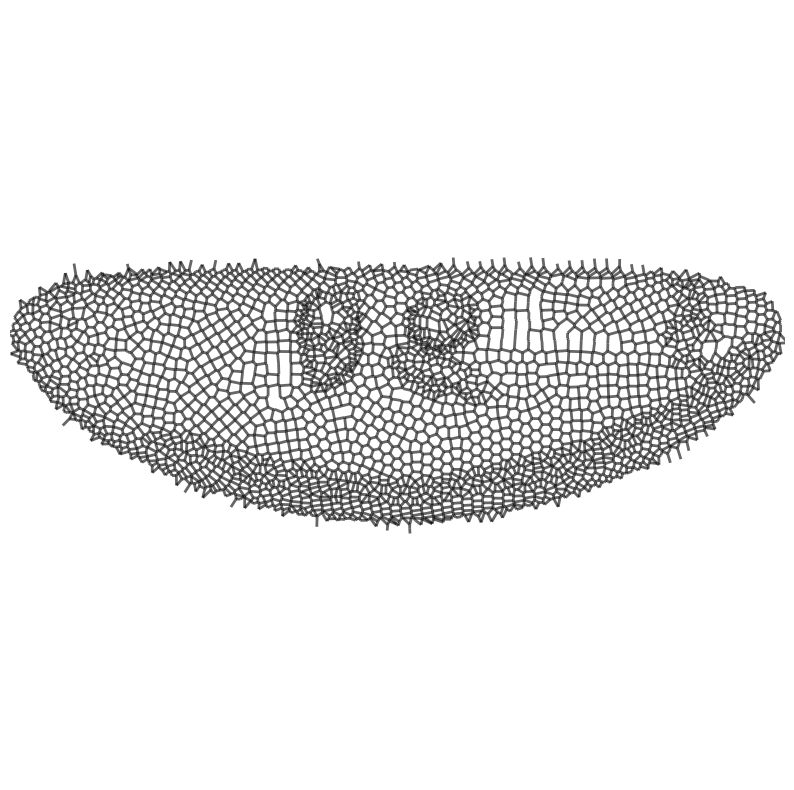

In [73]:
positions = dat[-1]

x,y,z = positions[:,0,0], positions[:,0,1], positions[:,0,2]
# only get x and y 
xy_coordinates = np.vstack((x[y > 0],z[y>0])).T

print(xy_coordinates.shape)

fig, ax = plt.subplots(figsize=(10,10))

vor = Voronoi(xy_coordinates, )
fig = voronoi_plot_2d(vor, show_vertices=False, line_width=2, line_alpha=0.6, point_size=10, ax = ax, point_alpha=0)
ax.set_xlim(-65,65)
ax.set_ylim(-65,65)




ax.axis('off')
# add image to the plot
# im = plt.imread('egg_cutout.png')
# newax = fig.add_axes([.1, .07, .8, .8], anchor='NE', zorder=99)
# newax.imshow(im)
# newax.axis('off')





# remove the axes

In [19]:



vor.vertices

array([[ -5.4253806 ,  14.37559748],
       [-42.7920169 ,   9.93891771],
       [ -2.84871174,   9.41388831],
       ...,
       [  5.01459882,  -2.20736543],
       [  6.46789454,  -1.30074029],
       [  6.11723198,  -2.0981364 ]])

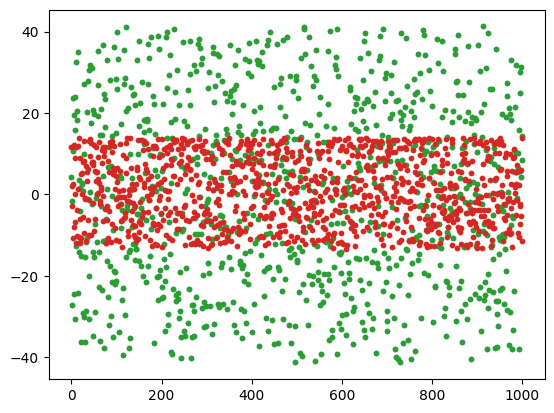

In [15]:
plt.plot(vor.points,'.')



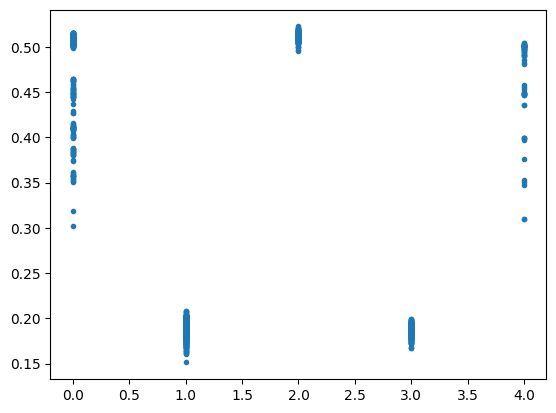

In [22]:
plt.plot(properties, -energies[9,:],'.')

In [1]:
import jax
import cProfile


In [2]:
from simulate import main, G

G["name"] = "testing_test"
cProfile.run("main(G['N_cells'], G['N_steps'], 'new')", sort="cumtime")


starting simulation


  0%|          | 0/40 [00:00<?, ?it/s]

         9903320 function calls (9640038 primitive calls) in 98.863 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       99    0.001    0.000   66.343    0.670 selectors.py:313(_select)
       99   34.876    0.352   66.343    0.670 {built-in method select.select}
       22   31.433    1.429   31.471    1.430 mlir.py:2358(_wrapped_callback)
      100    0.000    0.000   14.457    0.145 events.py:82(_run)
      100    0.000    0.000   10.735    0.107 {method 'run' of '_contextvars.Context' objects}
       79    9.210    0.117    9.283    0.118 zmqstream.py:607(_handle_events)
       23    0.000    0.000    9.233    0.401 asyncio.py:200(_handle_events)
      8/5    0.000    0.000    7.772    1.554 threading.py:616(wait)
      8/5    0.000    0.000    7.772    1.554 threading.py:302(wait)
   139/32    7.772    0.056    7.771    0.243 {method 'acquire' of '_thread.lock' objects}
        7    3.524    0.503    3.524    0.503 

In [3]:
%debug

> c:\users\jakob\miniconda3\envs\thesis\lib\site-packages\jax\_src\interpreters\pxla.py(1144)__call__()
   1142         or self.has_host_callbacks):
   1143       input_bufs = self._add_tokens_to_inputs(input_bufs)
-> 1144       results = self.xla_executable.execute_sharded(
   1145           input_bufs, with_tokens=True
   1146       )

*** NameError: name 'G' is not defined
> c:\users\jakob\documents\thesis\code\simulate.py(438)main()
    436         return cells, all_cells, old_nbs, cell_properties, all_energies, energies
    437 
--> 438     cells, all_cells, old_nbs, cell_properties, all_energies, energies = jax.lax.fori_loop(0, N_steps, loop_fn, (cells, all_cells, old_nbs, cell_properties, all_energies, energies))
    439 
    440     save_to_disk(all_cells, cell_properties, all_energies,  G)

    [... skipped 10 hidden frame(s)]

> c:\users\jakob\appdata\local\temp\ipykernel_16296\2473322235.py(4)<module>()

*** all frames above hidden, use `skip_hidden False` to get get into th

In [40]:
poss = dat[400,:,0]

In [41]:
# find all the internal distances

from scipy.spatial.distance import pdist, squareform

dists = squareform(pdist(poss))

# find the three closest points to each point

closest = np.argsort(dists, axis=1)[:,1:4]

# find the mean distance to the three closest points

mean_dist = np.mean(dists[np.arange(dists.shape[0])[:,None], closest], axis=1)


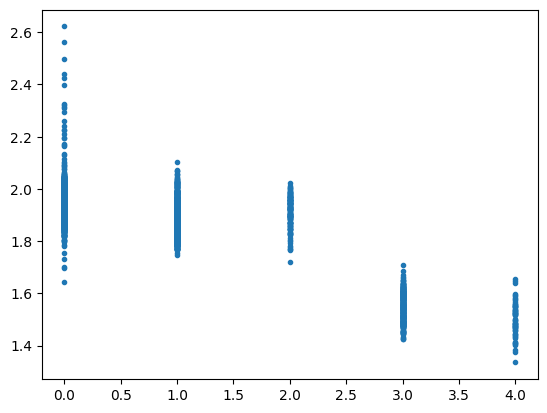

In [42]:
plt.plot(properties, np.abs(mean_dist),'.')

array([0.12868205, 0.37267659, 0.01252224, ..., 0.02381659, 0.05457079,
       0.14277902])

In [16]:
# find the nans
np.isnan(dat)


array([[[[False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False]],

        ...,

        [[False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False]],

        ...,

        [[False, False, False],
         [False, False, False],
         [False, False, 

In [44]:
positions = dat[:,:,0,:][dat[:,:,0,2] < 25]

In [45]:
positions.shape

(4999000, 3)

In [31]:
not_too_high = z 
sum(not_too_high.flatten())


1

In [9]:
with h5py.File("runs/random_baby.hdf5", 'r') as f:
    dat = f['cells'][:]

positions = dat[-1]

# save as numpy array
np.savetxt("export_random_baby.csv", positions[:,0], delimiter=",")

array([[ 23.730455 ,  -1.5572965,  -9.797461 ],
       [ 15.976235 ,  -3.1266773, -11.974436 ],
       [-23.99422  ,  -0.8718436, -14.742763 ],
       ...,
       [ -1.6042644,  21.534569 ,  -2.1183248],
       [ -4.5829926, -13.12369  ,  17.205118 ],
       [-27.758295 ,  19.287895 ,   3.600962 ]], dtype=float32)

In [14]:
good = np.where(z[0,0,:] > 0)[0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

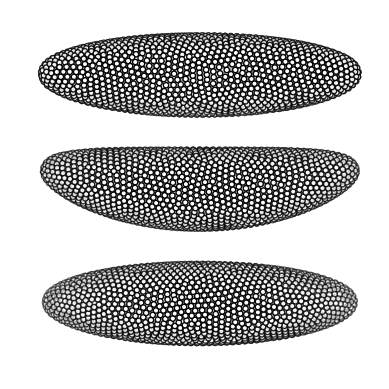

In [33]:
# make a 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

size = 15

# plot the positions
ax.scatter(positions[0, :, 0], positions[0, :, 1], positions[0, :, 2], s=size)

# remove the axes
ax.set_axis_off()

# place the camera
ax.view_init(0, 270)


# make an animation of the data
def animate(i):
    ax.clear()
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_zlim(-30, 30)

    x, y ,z = positions[i, :, 0], positions[i, :, 1], positions[i, :, 2]

    # plot white dots with black outlines
    ax.scatter(x, y, z, s=size,       c='w', edgecolors='k')

    ax.scatter(x, z,  y - 40, s=size, c='w', edgecolors='k')

    ax.scatter(x, -z, y + 40, s=size, c='w', edgecolors='k')

    # remove the axes
    ax.set_axis_off()

    # place the camera
    ax.view_init(0, 270)

ani = animation.FuncAnimation(fig, animate, frames=positions.shape[0], interval=4)
ani.save('ani_test.mp4')

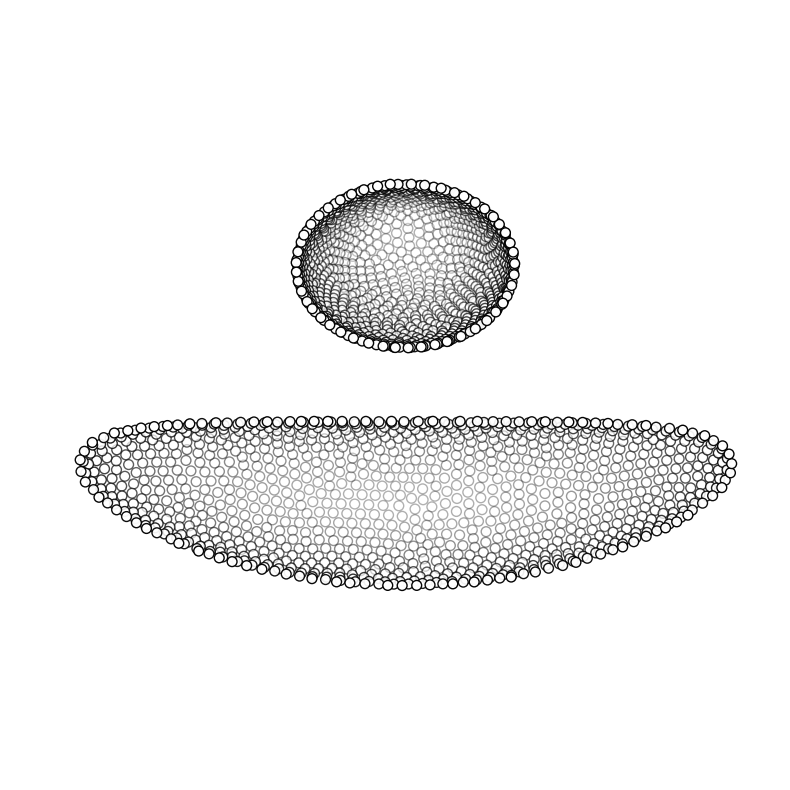

In [42]:
# make a 3d plot of the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

size = 50

# plot the positions
ax.scatter(positions[0, :, 0], positions[0, :, 1], positions[0, :, 2], s=size)

# remove the axes
ax.set_axis_off()

# place the camera
ax.view_init(0, 270)


# make an animation of the data
def animate(i):
    ax.clear()
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_zlim(-30, 30)

    x, y ,z = positions[i, :, 0], positions[i, :, 1], positions[i, :, 2]

    # plot white dots with black outlines
    ax.scatter(x[y > 0], y[y > 0], z[y > 0]-20, s=size,       c='w', edgecolors='k')

    ax.scatter(y[x > 0], x[x > 0], z[x > 0]+20, s=size,       c='w', edgecolors='k')


    # remove the axes
    ax.set_axis_off()

    # place the camera
    ax.view_init(0, 270)

ani = animation.FuncAnimation(fig, animate, frames=100, interval=4)
ani.save('test_vid.mp4')